#R-Type Calcium Channel Development
Marc Spehr communicated: Attached are data for the R-type Cav channel that we have isolated pharmacologically using SNX-482. You will find a steady-state activation curve (incl. sigmoidal fit and corresponding fit coefficients), an IV (current density (i.e., pA / pF) versus membrane voltage), a plot (and corresponding .xlsx data file) of the activation time constant versus Vmembrane (incl. an exponential fit), and a bar graph (log scale) depicting several channel parameters. Note that the inactivation is incomplete (i.e. ~69% of current remain; ~31% reduction), thus the relatively short inactivation time constant.

The data supplied the following:

![alt text](ICav_R-type_iAMCs_activation.jpg)
Sigmoid fit of R Type Cav Steady State Activation
![alt text](ICav_R-type_iAMCs_activation_time_constant.jpg)
Exponential fit of R type Cav activation time course
![alt text](ICav_R-type_iAMCs_parameters.jpg)
R type Cav parameters
![alt text](ICav_R-type_iAMCs_IV.jpg)
R type Cav IV curve
Two Excel files were also supplied containing Tau measurements for activation and inactivation of the R Type Cav channel.

**The following two cells have the Tau curve fits for R-type CaV activation and inactivation using an exponential equation.**

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
Populating the interactive namespace from numpy and matplotlib


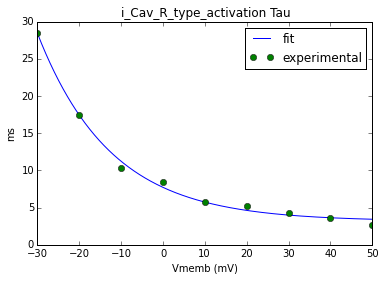

In [12]:
%pylab inline
v = np.linspace(-30, 50, num=2000)
v_exp = array([-30, -20, -10, 0, 10, 20, 30, 40, 50])
mtau = array([28.5,17.5,10.3,8.4,5.8,5.2,4.3,3.6,2.6])
fit = 3.1738 + (25.238 * (np.exp(-1 * ((v+30)/17.498))))

plt.plot(v, fit, v_exp, mtau, 'o')
plt.title('i_Cav_R_type_activation Tau')
plt.xlabel('Vmemb (mV)')
plt.ylabel('ms')
plt.legend(['fit', 'experimental'], loc='upper right')

Populating the interactive namespace from numpy and matplotlib


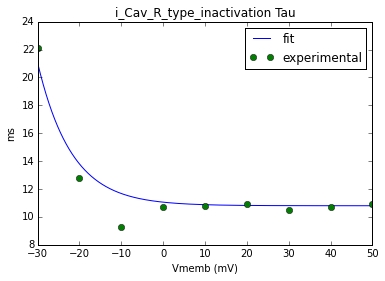

In [8]:
%pylab inline
v = np.linspace(-30, 50, num=2000)
v_exp = array([-30, -20, -10, 0, 10, 20, 30, 40, 50])
htau = array([22.1,12.8,9.3,10.7,10.8,10.9,10.5,10.7,10.9])
fit = 10.8 + (3.0 * (np.exp(-1 * ((v+20)/8.13))))

plt.plot(v, fit, v_exp, htau, 'o')
plt.title('i_Cav_R_type_inactivation Tau')
plt.xlabel('Vmemb (mV)')
plt.ylabel('ms')
plt.legend(['fit', 'experimental'], loc='upper right')

**Plots of the R-type Cav channel gating variables as they appear in the ChannelML using the fits above. hinf was estimated by reversing the sign on scale then adding an adjustment to reduce inactivation to 31% 0f total activation.**

Populating the interactive namespace from numpy and matplotlib


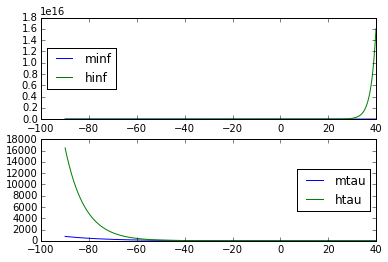

In [2]:
%pylab inline
v = np.linspace(-90,40,2000)
minf = 1 / (1 + np.exp(0 - (v + 38.037)/ 2.0914))
hinf = 1/1+(np.exp(-1 * (v-(-38.037))/-2.0914)) + 0.6928/1+(exp(-1 * (v-(-38.037))/2.0914))
mtau = 3.1738 + (25.238 * (np.exp(-1 * ((v+30)/17.498))))
htau = 10.8 + (3.0 * (np.exp(-1 * ((v+20)/8.13))))
subplot (2,1,1)
plt.plot (v, minf, v, hinf)
plt.legend(['minf', 'hinf'], loc='center left')
subplot (2,1,2)
plt.plot (v, mtau, v, htau)
plt.legend(['mtau', 'htau'], loc='center right')

**Scaling issues plot minf and mtau separately:** 

Populating the interactive namespace from numpy and matplotlib


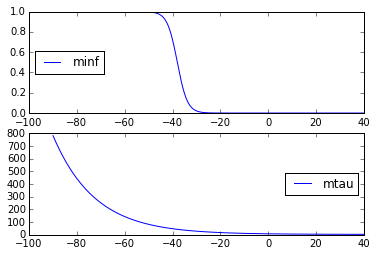

In [21]:
%pylab inline
v = np.linspace(-90,40,2000)
minf = 1 / (1 + np.exp(0 - (v + 38.037)/ 2.0914))
mtau = 3.1738 + (25.238 * (np.exp(-1 * ((v+30)/17.498))))
subplot (2,1,1)
plt.plot (v, minf)
plt.legend(['minf'], loc='center left')
subplot (2,1,2)
plt.plot (v, mtau)
plt.legend(['mtau'], loc='center right')

**Some issues now evident:**

**minf sigmoid equation as expected, but the equation for hinf needs fixing.**
**mtau and htau are very large at Vm below -40. They were fitted on values above  -40 and plotting above this value (below) gives values in the expected range:**

Populating the interactive namespace from numpy and matplotlib


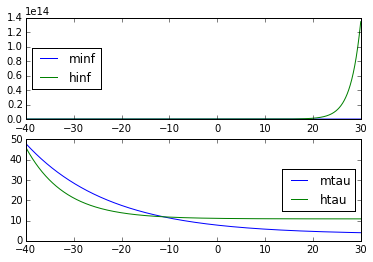

In [20]:
%pylab inline
v = np.linspace(-40,30,2000)
minf = 1 / (1 + np.exp(0 - (v + 38.037)/ 2.0914))
hinf = 1/1+(np.exp(-1 * (v-(-38.037))/-2.0914)) + 0.6928/1+(exp(-1 * (v-(-38.037))/2.0914))
mtau = 3.1738 + (25.238 * (np.exp(-1 * ((v+30)/17.498))))
htau = 10.8 + (3.0 * (np.exp(-1 * ((v+20)/8.13))))
subplot (2,1,1)
plt.plot (v, minf, v, hinf)
plt.legend(['minf', 'hinf'], loc='center left')
subplot (2,1,2)
plt.plot (v, mtau, v, htau)
plt.legend(['mtau', 'htau'], loc='center right')

**A double exponential is needed to make -40 the peak value for tau with a decay either side of this value.**

Populating the interactive namespace from numpy and matplotlib


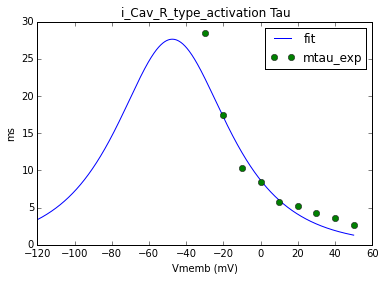

In [247]:
%pylab inline
v = np.linspace(-120, 50, num=2000)
v_exp = array([-30, -20, -10, 0, 10, 20, 30, 40, 50])
mtau = array([28.5,17.5,10.3,8.4,5.8,5.2,4.3,3.6,2.6])
fit = 3.4 / ((np.exp (( v - 25)/26)) + (np.exp ((-v - 120)/26)))
#fit = (1.6738 + (26.738 * (np.exp(0 - np.square((v + 30)/17.498)))))
#fit = 3.1738 + (25.238 * (np.exp(-1 * ((v+30)/17.498))))
#1 / ((exp (( V + 30 )/20)) + (exp ((-V - 80)/10)))
plt.plot(v, fit, v_exp, mtau, 'o')
plt.title('i_Cav_R_type_activation Tau')
plt.xlabel('Vmemb (mV)')
plt.ylabel('ms')
plt.legend(['fit', 'mtau_exp'], loc='upper right')

**Wthout experimental values for mtau at Vm below -30 it is difficult to know what the ccurve should be like. However, if we use the fit equation above, at least it will not shoot up so high that it causes a scopmath error.**  

Populating the interactive namespace from numpy and matplotlib


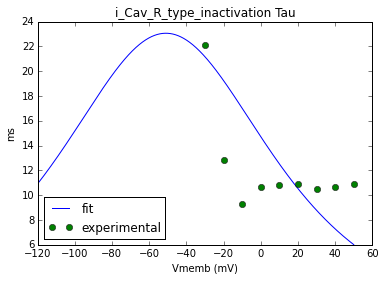

In [246]:
%pylab inline
v = np.linspace(-120, 50, num=2000)
v_exp = array([-30, -20, -10, 0, 10, 20, 30, 40, 50])
htau = array([22.1,12.8,9.3,10.7,10.8,10.9,10.5,10.7,10.9])
s = 50
fit = 9.5 / ((np.exp (( v - 28)/s)) + (np.exp ((-v - 130)/s)))
#fit = 3.4 / ((exp (( v - 24)/26)) + (exp ((-v - 120)/26)))
#fit = 10.8 + (3.0 * (np.exp(-1 * ((v+20)/8.13))))
#fit = (1.6738 + (26.738 * (np.exp(0 - np.square((v + 30)/17.498)))))
#fit = 3.1738 + (25.238 * (np.exp(-1 * ((v+30)/17.498))))
#1 / ((exp (( V + 30 )/20)) + (exp ((-V - 80)/10)))
plt.plot(v, fit, v_exp, htau, 'o')
plt.title('i_Cav_R_type_inactivation Tau')
plt.xlabel('Vmemb (mV)')
plt.ylabel('ms')
plt.legend(['fit', 'experimental'], loc='lower left')

**Again to get a good htau fit we would need more data points, so the above equation is just to stop the values getting too high. The curve fit below used a mirror image of the data points to try to achieve a fit, but does not really do any better.**

Populating the interactive namespace from numpy and matplotlib


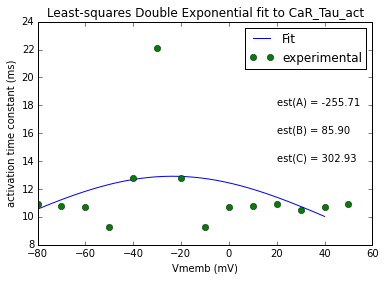

In [211]:
#load python packages
%pylab inline
from scipy.optimize import leastsq

# set parameters for curve-fit
v = array([-80, -70, -60, -50, -40,-30, -20, -10, 0, 10, 20, 30, 40, 50])
y = array([10.9, 10.8, 10.7, 9.3, 12.8, 22.1,12.8,9.3,10.7,10.8,10.9,10.5,10.7,10.9])

# This version produces an asymetrical curve therefore modifying to B=D
# def func(v, A, B, C, D):
#    """Double Exponential equation."""
#    return 1/((np.exp((v+A)/B))+(np.exp((-v-C)/D)))

# symetrical curve version
def func(v, A, B, C):
    """Double Exponential equation."""
    return 1/((np.exp((v+A)/B))+(np.exp((-v-C)/B)))

def residuals(p, y, v):
    """Deviations of data from fitted DE curve"""
    A,B,C = p
    err = y-func(v, A, B, C)
    return err

def peval(v, p):
    """Evaluated value at v with current parameters."""
    A,B,C = p
    return func(v, A, B, C)

# Initial guess for parameters
# p0 = [60, 5, 8]
p0 = [9, 17, 140]

# Fit equation using least squares optimization
plsq = leastsq(residuals, p0, args=(y, v))

# Plot results
vv = np.linspace(-80, 40, num=501)
plt.plot(vv,peval(vv,plsq[0]),v,y,'o')
plt.title('Least-squares Double Exponential fit to CaR_Tau_act')
plt.xlabel('Vmemb (mV)')
plt.ylabel('activation time constant (ms)')
plt.legend(['Fit', 'experimental'], loc='upper right')
for i, (param, est) in enumerate(zip('ABC', plsq[0])):
    plt.text(20, 18-i*2, 'est(%s) = %.2f' % (param, est))
#plt.savefig('iAMC_Na_Tau_act.png')

**Experiment with the hinf equation to correct it:** 

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


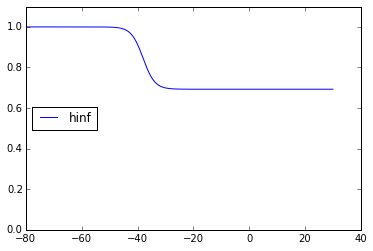

In [30]:
%pylab inline
v = np.linspace(-80,30,2000)
hinf = 1/(1+exp(-(v-(-38.037))/-2.0914)) + 0.6928/(1+exp(-(v-(-38.037))/2.0914))
plt.plot (v, hinf)
axes = plt.gca()
axes.set_ylim([0.0,1.1])
plt.legend(['hinf'], loc='center left')

**Got it, the denominator term in each fraction needs to be enclosed by parentheses.**

**Plot both Steady State terms.**

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


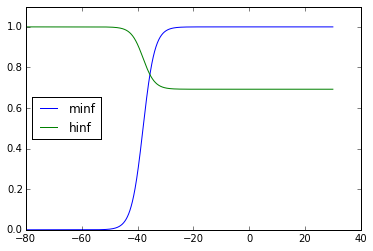

In [31]:
%pylab inline
v = np.linspace(-80,30,2000)
minf = 1 / (1 + np.exp(0 - (v + 38.037)/ 2.0914))
hinf = 1/(1+(np.exp(-1 * (v-(-38.037))/-2.0914))) + 0.6928/(1+(exp(-1 * (v-(-38.037))/2.0914)))
plt.plot (v, minf, v, hinf)
axes = plt.gca()
axes.set_ylim([0.0,1.1])
plt.legend(['minf', 'hinf'], loc='center left')

**Putting these new/reworked equations into the ChannelML file resolves the scopmath library error. Here are the neuroConstruct Generated plots of the gating variables:**
![alt text](m_gate_variables_cav.png)
![alt text](h_gate_variables_cav.png)

**The Tau curves look as they should be, but minf has been reversed as though it has a negative scale and hinf has not been represented.** 

**Not sure what is happening here!**

**OK, ChannelML uses different equations for Sigmoid which requires a reversal of the sign for scale.**

**Also, Marc has advised that there is no current through this channel below Vm = -30. Therefore it will be better to use the exponential fits for Tau with an If... Else... statement limiting Tau to -30 value below -30**

In [3]:
%pylab inline
v = -30
mtau = 3.1738 + (25.238 * (np.exp(-1 * ((v+30)/17.498))))
htau = 10.8 + (3.0 * (np.exp(-1 * ((v+20)/8.13))))
print mtau, "mtau (ms)"
print htau, "htau (ms)"

Populating the interactive namespace from numpy and matplotlib
28.4118 mtau (ms)
21.0638148543 htau (ms)


**Here are the neuroConstruct generated gate variables after the tau curves are changed back to the exponentials and capped below -30 mV and minf is fixed ffor ChannelML. Unfortunately hinf is not plotted. Must look at the generated Neuron and see if it is correctly rendered.**

![alt text](m_gate_variables_CaR.png)
**M Gate Variables**
![alt text](h_gate_variables_CaR.png)
**H Gate Variables**